In [1]:
# While dealing with cluster, there is seperation between two classes and will seperated in that case we use LDA
# LDA is a linear model for classification and dimensionality reduction 
# Feature extraction
# why LDA??
# Logistic regression is most popular linear classification models that perform binary classification( 2 output) but falls short
# in multiclass classification (target columns has more than 2 catogries,   LDA does not work with this)
# Instead of finding new axes that maximizing the seperability among the known classes in the target columns
# If the features is more than sample so for reducing dimension we use LDA
# Also known as features extraction method because we focuse only on important features
# Goal of LDA---> To project a feature space (N_dimensional data) onto a smaller subspace k (k<=n-1) while maintaining the class
# discrimination info


#Within class scatter matrix(WCSM)---> it is calculated by first finding coveriance than within class scatter matrix can be
#calculated by adding coveriance---> by this we can find out Eigen values and Eigen vector to reduce the data
#it is used to maintain seperation--->it calculate overall data points
#combination of within class scatter metrix and between class scatter matrix formed LDA

In [2]:
# Steps to perform LDA:
# 1) Import the liberaries
# 2) Data loading 
# 3) EDA
# 4) Standardizing
# 5) X and Y, train test split
# 6) model building 
# 7) LDA
# 8) classification model

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split


In [4]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
# Load digit is a built in datasets in the scikit learn machine learning library in pyton, which consist of 1,797 grayscale
# image of size 8*8 pixels. Each image is a handwritten digits(0-9) represented as a 2D array of pixel values ranging from 
# 0(black) to 16(white).
# The load_digits dataset is often used for classification tasks, where the goal is to train a mechine learning model to 
# correctly classify a new image into one model of the 10 possible digits classes

#For classification model future extraction most of the time LDA is applied
#Goal of PCA is to find dimension reduction or principle component
#Goal of LDA is to find combination of feature that can maximize the seperation between the classes

#Use cases for PCA and LDA
#1. PCA--->typically used for unsupervised dimensionality reduction, feature etraction . when the goal is to reduce the 
#dimensionality while preserving the variance in the data
#2. LDA---> commenly used for supervised dimensionality reduction, and classification models. When the goal is to findout
#discriminant feature that can improve the seperability b/w the classes.It assume that the classes have equal covariance matrics


#In ki square test---> we finding out is there any relationship between the variables or only b/w two variable

In [6]:
data1 = pd.DataFrame(digits.data)
data1

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


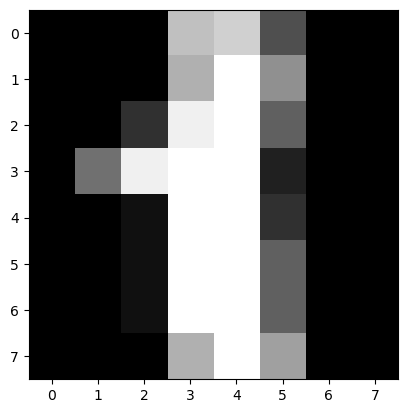

In [26]:
plt.imshow(digits.images[1], cmap=plt.cm.gray)

In [8]:
X = digits.data           #info of digits

In [9]:
Y = digits.target         #info of handwritten digits

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2, random_state=999)

In [11]:
#feature scaling
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)


In [12]:
t1 = pd.DataFrame(digits.target)
t1

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [13]:
t1.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

In [14]:
# LDA
lda = LinearDiscriminantAnalysis(n_components=5)    #n_component = no. of classes -1

In [15]:
X_train = lda.fit_transform(X_train,Y_train)
X_test = lda.transform(X_test)

In [16]:
X_train.shape

(1437, 5)

In [17]:
X_test

array([[-2.34417168e+00, -9.34983549e-02, -3.01565650e-01,
         5.93615688e-01,  1.16988775e-01],
       [-4.17999252e+00,  7.44103673e-01, -6.98746021e-01,
        -1.66966635e+00,  1.11538966e+00],
       [-2.00010724e+00,  1.03189738e+00,  8.96512017e-01,
        -3.13865376e-01,  1.11578466e-01],
       ...,
       [ 1.61287473e+00,  4.79146739e+00, -7.63085903e-01,
         8.78929518e-01, -1.70238188e+00],
       [ 6.60625864e+00, -5.11974032e-01,  1.01297005e+00,
         2.43922082e+00, -4.78861708e-03],
       [-7.78495176e-01, -4.09320887e+00,  1.43346579e+00,
         3.51364763e-01,  8.53114946e-01]])

### Random Forest classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)


In [20]:
Y_pred

array([3, 3, 3, 1, 9, 6, 9, 6, 1, 4, 8, 1, 4, 5, 8, 5, 3, 6, 9, 1, 9, 2,
       2, 5, 7, 6, 8, 8, 2, 2, 6, 0, 2, 2, 3, 0, 2, 6, 0, 0, 2, 1, 3, 9,
       1, 3, 2, 3, 7, 0, 9, 1, 2, 6, 4, 0, 7, 6, 7, 3, 9, 9, 0, 3, 1, 2,
       5, 6, 6, 9, 2, 4, 9, 4, 4, 1, 2, 0, 6, 6, 5, 7, 0, 4, 9, 2, 6, 8,
       1, 9, 4, 0, 9, 0, 7, 6, 2, 0, 6, 8, 1, 0, 6, 6, 3, 4, 5, 9, 4, 2,
       6, 5, 6, 0, 5, 5, 9, 8, 1, 8, 8, 0, 4, 9, 4, 5, 3, 4, 7, 7, 8, 9,
       8, 1, 1, 1, 2, 6, 6, 4, 0, 9, 6, 6, 4, 2, 3, 6, 6, 4, 0, 1, 1, 7,
       3, 7, 8, 0, 8, 6, 2, 3, 9, 2, 2, 1, 7, 4, 0, 4, 7, 5, 5, 7, 9, 8,
       5, 4, 9, 4, 8, 1, 3, 4, 9, 1, 1, 4, 3, 5, 2, 4, 7, 6, 9, 6, 8, 0,
       2, 1, 0, 8, 0, 2, 0, 9, 2, 3, 2, 3, 6, 2, 7, 9, 2, 4, 0, 8, 1, 1,
       9, 2, 4, 4, 0, 3, 5, 5, 6, 5, 9, 9, 9, 4, 9, 3, 3, 1, 2, 0, 6, 6,
       3, 0, 7, 1, 6, 0, 1, 1, 9, 9, 3, 7, 4, 1, 8, 9, 0, 2, 3, 0, 5, 2,
       4, 2, 7, 7, 9, 0, 5, 8, 6, 2, 4, 2, 3, 4, 3, 8, 5, 8, 4, 5, 5, 2,
       4, 9, 0, 3, 9, 2, 0, 5, 0, 1, 1, 7, 7, 8, 1,

In [21]:
Y_test

array([9, 3, 3, 1, 3, 6, 9, 6, 1, 4, 8, 8, 4, 5, 8, 8, 3, 6, 9, 1, 9, 2,
       2, 5, 7, 6, 8, 8, 2, 2, 6, 0, 2, 2, 3, 0, 2, 6, 0, 0, 2, 1, 3, 9,
       1, 2, 2, 5, 7, 0, 9, 2, 2, 4, 4, 0, 7, 6, 7, 3, 5, 9, 0, 3, 1, 2,
       5, 6, 6, 8, 2, 0, 9, 4, 4, 1, 2, 0, 6, 6, 5, 7, 0, 4, 9, 2, 6, 8,
       1, 9, 4, 0, 9, 0, 7, 6, 2, 0, 6, 9, 1, 0, 6, 6, 3, 4, 7, 9, 4, 2,
       6, 5, 6, 0, 5, 5, 9, 8, 1, 8, 1, 0, 4, 9, 4, 5, 3, 4, 7, 7, 8, 9,
       3, 1, 8, 8, 2, 4, 6, 4, 0, 9, 6, 6, 4, 2, 3, 6, 6, 4, 0, 1, 1, 7,
       3, 7, 8, 0, 8, 6, 2, 3, 9, 2, 2, 1, 7, 4, 0, 4, 7, 5, 5, 7, 9, 1,
       5, 4, 9, 4, 8, 1, 3, 4, 3, 1, 1, 4, 9, 5, 2, 4, 7, 6, 9, 6, 8, 0,
       2, 1, 0, 8, 0, 2, 0, 9, 2, 9, 2, 3, 4, 2, 7, 9, 2, 4, 0, 8, 8, 1,
       9, 2, 4, 4, 0, 3, 5, 5, 6, 5, 9, 7, 9, 4, 9, 3, 3, 8, 2, 0, 6, 6,
       3, 0, 7, 2, 6, 0, 1, 1, 9, 9, 3, 7, 4, 1, 8, 9, 0, 3, 3, 0, 5, 2,
       4, 2, 7, 7, 9, 0, 5, 8, 6, 2, 4, 2, 3, 4, 3, 8, 5, 8, 4, 5, 5, 2,
       4, 9, 0, 3, 9, 2, 0, 5, 0, 1, 1, 7, 7, 1, 6,

In [22]:
from sklearn.metrics import *

In [23]:
confusion_matrix(Y_pred,Y_test)

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  2,  0,  0,  0,  1,  0,  5,  0],
       [ 0,  0, 42,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 31,  0,  1,  0,  0,  0,  3],
       [ 1,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 25,  0,  1,  1,  0],
       [ 0,  2,  0,  0,  3,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 26,  0,  0],
       [ 0,  3,  0,  1,  1,  0,  0,  0, 20,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  1,  1, 39]], dtype=int64)

In [24]:
accuracy_score(Y_pred,Y_test)

0.9083333333333333